# Lending Club Data Set (Exploring The Data)

### How to get the data:
Though the data is available on Lending Club website, an account is required. The used dataset in this assignment is available on Kaggle in the following url:
https://www.kaggle.com/wendykan/lending-club-loan-data/data

The data is in CSV format. A list of variables and their descriptions is attached to the dataset. (Important variables will be descriped in later sections.

## Dataset Description

    Lending Club is a peer to peer lending company based in the United States; meaning that it operates on bridging between investors and borrowers. The dataset contains the loan data for all loans issued between 2007 and 2015; including data about the loan (amount, interest rate, term,..) and the borrower (job, income, home ownership,..). The include both numerical and categorical features. It can be used for classification problems (predict loan status) or regression problems (predict collected amount from the loan). The data is quite large with over 2 million entries for its 145 columns. Due to the limitation of the processing power, the analysis will be conducted on a partial dataset (100,000 observations) and only important variables will be analyzed. 


## Get & Clean The Data

### Import necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reset all styles to the default:
plt.rcParams.update(plt.rcParamsDefault)
# Then make graphs inline:
%matplotlib inline

In [2]:
# Set custom style settings:
# NB: We need to separate "matplotlib inline" call and these settings into different
# cells, otherwise the parameters are not set. This is a bug somewhere in Jupyter
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 16
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'large'
plt.rcParams['lines.markersize'] = 10

### Load The Data

- **Import the data into a pandas dataframe.**
- **Show the first five observations.**

In [3]:
df = pd.read_csv("loan.csv",low_memory=False)
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0 NaN        NaN       2500         2500           2500.0   36 months   
1 NaN        NaN      30000        30000          30000.0   60 months   
2 NaN        NaN       5000         5000           5000.0   36 months   
3 NaN        NaN       4000         4000           4000.0   36 months   
4 NaN        NaN      30000        30000          30000.0   60 months   

   int_rate  installment grade sub_grade  ... hardship_payoff_balance_amount  \
0     13.56        84.92     C        C1  ...                            NaN   
1     18.94       777.23     D        D2  ...                            NaN   
2     17.97       180.69     D        D1  ...                            NaN   
3     18.94       146.51     D        D2  ...                            NaN   
4     16.14       731.78     C        C4  ...                            NaN   

  hardship_last_payment_amount disbursement_method  debt_settlement_flag  \
0                          NaN                Cash                     N   
1                          NaN                Cash                     N   
2                          NaN                Cash                     N   
3                          NaN                Cash                     N   
4                          NaN                Cash                     N   

  debt_settlement_flag_date settlement_status settlement_date  \
0                       NaN               NaN             NaN   
1                       NaN               NaN             NaN   
2                       NaN               NaN             NaN   
3                       NaN               NaN             NaN   
4                       NaN               NaN             NaN   

  settlement_amount  settlement_percentage settlement_term  
0               NaN                    NaN             NaN  
1               NaN                    NaN             NaN  
2               NaN                    NaN             NaN  
3               NaN                    NaN             NaN  
4               NaN                    NaN             NaN  

[5 rows x 145 columns]

- **Get a general idea of the data.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 2.4+ GB


**=> The data is relatively large, and due to the limitations of the current hardware, processing this large amount wouldn't be feasible.**

- **Sample the data (100,000 observations) to ease the data exploration.**
- **Save the data to a CSV file for future analysis.**

In [5]:
df_sampled = df.sample(100000)
df_sampled.to_csv('Lending_club_sampled.csv',index=False)

**Delete the variables to clear up some memory.**

In [6]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


**Load and view the sampled data.**

In [58]:
df_loan = pd.read_csv('Lending_club_sampled.csv')
df_loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0 NaN        NaN      12000        12000          12000.0   60 months   
1 NaN        NaN       7000         7000           7000.0   36 months   
2 NaN        NaN       7000         7000           7000.0   36 months   
3 NaN        NaN      35000        35000          35000.0   36 months   
4 NaN        NaN      20000        20000          20000.0   60 months   

   int_rate  installment grade sub_grade               emp_title emp_length  \
0     15.05       285.80     C        C4  HUman Resource Manager    2 years   
1      7.07       216.37     A        A2                     NaN        NaN   
2     14.33       240.37     C        C1          Motorwerks BMW    3 years   
3     10.91      1144.37     B        B4          System Analyst    3 years   
4     21.45       546.15     D        D5                     NaN        NaN   

  home_ownership  annual_inc verification_status   issue_d  \
0           RENT     75000.0     Source Verified  Oct-2017   
1       MORTGAGE     60000.0            Verified  Nov-2017   
2       MORTGAGE    130000.0        Not Verified  Jan-2013   
3           RENT    115000.0            Verified  Aug-2017   
4           RENT     68414.0            Verified  Sep-2017   

          loan_status pymnt_plan  url  \
0             Current          n  NaN   
1             Current          n  NaN   
2          Fully Paid          n  NaN   
3             Current          n  NaN   
4  Late (31-120 days)          n  NaN   

                                                desc             purpose  \
0                                                NaN         credit_card   
1                                                NaN  debt_consolidation   
2    Borrower added on 01/14/13 > Need to consoli...  debt_consolidation   
3                                                NaN              moving   
4                                                NaN  debt_consolidation   

                     title zip_code addr_state    dti  delinq_2yrs  \
0  Credit card refinancing    077xx         NJ  21.41          0.0   
1       Debt consolidation    064xx         CT  24.66          0.0   
2              Consolodebt    554xx         MN   9.57          0.0   
3    Moving and relocation    180xx         PA  16.56          0.0   
4       Debt consolidation    907xx         CA  30.47          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0         Sep-2011             1.0                     NaN   
1         Jun-1999             0.0                     NaN   
2         Apr-2006             3.0                    30.0   
3         Dec-2008             1.0                     NaN   
4         Jul-1987             0.0                     NaN   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN      18.0      0.0      15447        52.7   
1                     NaN      11.0      0.0      15369        48.6   
2                     NaN       9.0      0.0       1361        29.0   
3                     NaN      12.0      0.0      38248        54.8   
4                    84.0       9.0      1.0      13956        53.3   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0       19.0                   f    9619.15        9619.15   4547.720000   
1       15.0                   w    4261.92        4261.92   3240.050000   
2       26.0                   f       0.00           0.00   8608.560001   
3       24.0                   w   18922.21       18922.21  20577.450000   
4       22.0                   w   16787.22       16787.22   8144.580000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          4547.72          2380.85        2166.87                 0.0   
1          3240.05          2738.08         501.97                 0.0   
2          8608.56          7000.00        1608.56                 0.0   
3         20577.45         16077.79   

### Clean The Data

- #### Visualize Null columns

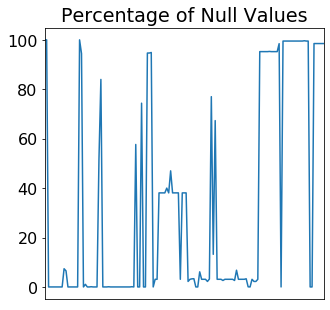

In [59]:
fig = (df_loan.isnull().sum(axis=0)/df_loan.shape[0]*100).plot(figsize=(5,5))
fig.axes.get_xaxis().set_visible(False)
plt.title('Percentage of Null Values');

 - #### Drop columns with null values percentage greater than 20%.

In [60]:
Na_columns = (df_loan.isnull().sum(axis=0)/df_loan.shape[0]*100)< 20
df_loan_cleaned = df_loan[Na_columns[Na_columns].index]
df_loan_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 87 columns):
loan_amnt                     100000 non-null int64
funded_amnt                   100000 non-null int64
funded_amnt_inv               100000 non-null float64
term                          100000 non-null object
int_rate                      100000 non-null float64
installment                   100000 non-null float64
grade                         100000 non-null object
sub_grade                     100000 non-null object
emp_title                     92627 non-null object
emp_length                    93486 non-null object
home_ownership                100000 non-null object
annual_inc                    100000 non-null float64
verification_status           100000 non-null object
issue_d                       100000 non-null object
loan_status                   100000 non-null object
pymnt_plan                    100000 non-null object
purpose                       100000 non-n

- #### Drop rows with na values.

In [61]:
df_loan_cleaned = df_loan_cleaned.dropna(axis=0)
df_loan_cleaned.shape

(73100, 87)

#### We are left with 73,100 observations and 87 columns.

Let's view them

In [62]:
pd.set_option('display.max_columns', None) #Show all columns
display(df_loan_cleaned.describe())
# Including only string columns in the description:
display(df_loan_cleaned.describe(include=[np.object]))

loan_amnt   funded_amnt  funded_amnt_inv      int_rate  \
count  73100.000000  73100.000000     73100.000000  73100.000000   
mean   15382.428865  15382.406635     15377.131918     13.237644   
std     9222.894241   9222.920423      9220.760165      4.893915   
min     1000.000000   1000.000000       725.000000      5.310000   
25%     8000.000000   8000.000000      8000.000000      9.710000   
50%    13662.500000  13662.500000     13650.000000     12.730000   
75%    20000.000000  20000.000000     20000.000000     16.020000   
max    40000.000000  40000.000000     40000.000000     30.990000   

        installment    annual_inc           dti   delinq_2yrs  inq_last_6mths  \
count  73100.000000  7.310000e+04  73100.000000  73100.000000    73100.000000   
mean     455.124634  8.131598e+04     19.034636      0.309973        0.612927   
std      268.092203  6.672570e+04     11.792827      0.845152        0.866219   
min       30.120000  2.000000e+01      0.000000      0.000000        0.000000   
25%      259.960000  5.000000e+04     12.370000      0.000000        0.000000   
50%      388.200000  6.970000e+04     18.130000      0.000000        0.000000   
75%      606.410000  9.700000e+04     24.690000      0.000000        1.000000   
max     1545.860000  6.599100e+06    999.000000     18.000000        8.000000   

           open_acc       pub_rec      revol_bal    revol_util     total_acc  \
count  73100.000000  73100.000000   73100.000000  73100.000000  73100.000000   
mean      12.167456      0.206047   16544.258741     49.663929     25.281642   
std        5.668794      0.591074   21146.636903     24.220649     12.055095   
min        1.000000      0.000000       0.000000      0.000000      3.000000   
25%        8.000000      0.000000    6148.750000     31.300000     16.000000   
50%       11.000000      0.000000   11531.000000     49.400000     23.000000   
75%       15.000000      0.000000   20341.000000     68.100000     32.000000   
max       63.000000     45.000000  867528.000000    366.600000    176.000000   

          out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  \
count  73100.000000   73100.000000  73100.000000     73100.000000   
mean    4479.680013    4478.700233  12154.732398     12150.008677   
std     7586.477615    7585.481536  10000.901857      9997.077451   
min        0.000000       0.000000     60.810000        47.810000   
25%        0.000000       0.000000   4514.257500      4512.860000   
50%        0.000000       0.000000   9457.560000      9454.930000   
75%     6796.440000    6793.870000  17062.016465     17056.257500   
max    39487.930000   39487.930000  62707.614649     62662.820000   

       total_rec_prncp  total_rec_int  total_rec_late_fee    recoveries  \
count     73100.000000   73100.000000        7.310000e+04  73100.000000   
mean       9551.584574    2455.479219        1.540808e+00    146.127801   
std        8430.606671    2705.230504        1.177245e+01    742.810060   
min           0.000000       0.000000       -2.000000e-09      0.000000   
25%        2994.575000     718.827500        0.000000e+00      0.000000   
50%        7000.000000    1544.270000        0.000000e+00      0.000000   
75%       14000.000000    3151.217500        0.000000e+00      0.000000   
max       40000.000000   27707.610000        7.144500e+02  27563.850000   

       collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  \
count             73100.000000     73100.000000                73100.000000   
mean                 24.543736      3623.753882                    0.017332   
std                 130.629551      6242.621797                    0.140600   
min                   0.000000         0.000000                    0.000000   
25%                   0.000000       320.767500                    0.000000   
50%                   0.000000       621.520000                    0.000000   
75%                   0.000000      4157.985000                    0.000000   
max             

term  grade sub_grade emp_title emp_length home_ownership  \
count        73100  73100     73100     73100      73100          73100   
unique           2      7        35     32708         11              6   
top      36 months      C        C1   Teacher  10+ years       MORTGAGE   
freq         51137  21357      4728      1411      26069          37626   

       verification_status   issue_d loan_status pymnt_plan  \
count                73100     73100       73100      73100   
unique                   3        77           7          2   
top        Source Verified  Mar-2016  Fully Paid          n   
freq                 30854      1931       33887      73073   

                   purpose               title zip_code addr_state  \
count                73100               73100    73100      73100   
unique                  13                2253      874         50   
top     debt_consolidation  Debt consolidation    750xx         CA   
freq                 41524               38844      845       9850   

       earliest_cr_line initial_list_status last_pymnt_d last_credit_pull_d  \
count             73100               73100        73100              73100   
unique              620                   2           77                 75   
top            Aug-2004                   w     Feb-2019           Feb-2019   
freq                528               50811        30143              45608   

       application_type hardship_flag disbursement_method debt_settlement_flag  
count             73100         73100               73100                73100  
unique                2             2                   2                    2  
top          Individual             N                Cash                    N  
freq              69329         73067               70591                71964

**Some columns has very low variance. They don't provide unique info.**  

    Let's drop them

In [63]:
low_std_cols = df_loan_cleaned.std() < 0.1
print(low_std_cols[low_std_cols].index.values)
df_loan_cleaned = df_loan_cleaned.drop(low_std_cols[low_std_cols].index.values,axis=1)

['policy_code' 'acc_now_delinq' 'num_tl_120dpd_2m' 'num_tl_30dpd']


#### Datatime columns.

    Some columns include date and time. We should change the data type for future manipulation.

In [64]:
datetime_cols = ['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
for col in datetime_cols:
    df_loan_cleaned[col] = pd.to_datetime(df_loan_cleaned[col])

#### Drop catergorical columns with a dominant item.

    Some categorical columns have almost the same value for all observations. Thus, they don't add new information for the modeling or anaylsis. Let's drop them.

In [65]:
cat_cols = df_loan_cleaned.select_dtypes('object').columns
n_rows = df_loan_cleaned.shape[0]
drop_cat = []
for col in cat_cols:
    most_freq_count = df_loan_cleaned[col].value_counts().values[0]
    if most_freq_count/n_rows > 0.9:
        drop_cat.append(col)
print(drop_cat)
df_loan_cleaned = df_loan_cleaned.drop(drop_cat,axis=1)

['pymnt_plan', 'application_type', 'hardship_flag', 'disbursement_method', 'debt_settlement_flag']


In [66]:
df_loan_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73100 entries, 0 to 99997
Data columns (total 78 columns):
loan_amnt                     73100 non-null int64
funded_amnt                   73100 non-null int64
funded_amnt_inv               73100 non-null float64
term                          73100 non-null object
int_rate                      73100 non-null float64
installment                   73100 non-null float64
grade                         73100 non-null object
sub_grade                     73100 non-null object
emp_title                     73100 non-null object
emp_length                    73100 non-null object
home_ownership                73100 non-null object
annual_inc                    73100 non-null float64
verification_status           73100 non-null object
issue_d                       73100 non-null datetime64[ns]
loan_status                   73100 non-null object
purpose                       73100 non-null object
title                         73100 non-null obje

#### Now that we have cleaned our data, let's check for any corrolation between numerical features.

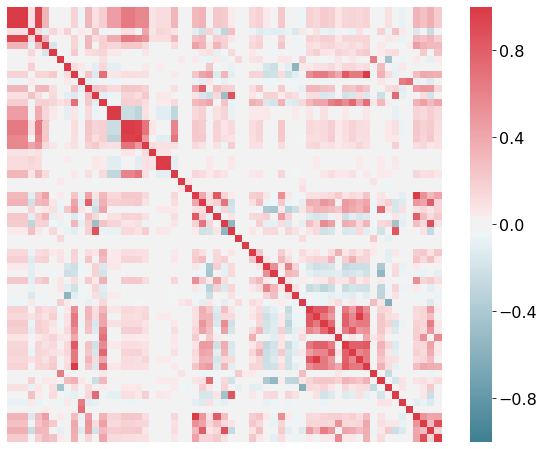

In [67]:
corr = df_loan_cleaned.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,vmin=-1, vmax=1,cmap=cmap,xticklabels=False,yticklabels=False,square=True)

#### Some columns are highly correlated. Let's drop them.

In [68]:
# https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/
# Create correlation matrix
corr_matrix = df_loan_cleaned.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print(to_drop)
df_loan_cleaned = df_loan_cleaned.drop(to_drop, axis=1)

['funded_amnt', 'funded_amnt_inv', 'installment', 'out_prncp_inv', 'total_pymnt_inv', 'total_rec_prncp', 'collection_recovery_fee', 'num_rev_tl_bal_gt_0', 'num_sats', 'tot_hi_cred_lim']


#### Done with cleaning. Let's save the cleaned sampled dataset for future analysis.

In [69]:
df_loan_cleaned.to_csv('Loan_sampled_cleaned.csv',index=False)
df_loan_cleaned.head()

loan_amnt        term  int_rate grade sub_grade               emp_title  \
0      12000   60 months     15.05     C        C4  HUman Resource Manager   
2       7000   36 months     14.33     C        C1          Motorwerks BMW   
3      35000   36 months     10.91     B        B4          System Analyst   
5      25000   60 months     11.49     B        B5                  Driver   
6       5000   36 months      5.32     A        A1            electrician    

  emp_length home_ownership  annual_inc verification_status    issue_d  \
0    2 years           RENT     75000.0     Source Verified 2017-10-01   
2    3 years       MORTGAGE    130000.0        Not Verified 2013-01-01   
3    3 years           RENT    115000.0            Verified 2017-08-01   
5    4 years       MORTGAGE     80000.0        Not Verified 2016-08-01   
6  10+ years       MORTGAGE     80000.0        Not Verified 2015-07-01   

  loan_status             purpose                    title zip_code  \
0     Current         credit_card  Credit card refinancing    077xx   
2  Fully Paid  debt_consolidation              Consolodebt    554xx   
3     Current              moving    Moving and relocation    180xx   
5  Fully Paid  debt_consolidation       Debt consolidation    840xx   
6  Fully Paid    home_improvement         Home improvement    088xx   

  addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  \
0         NJ  21.41          0.0       2011-09-01             1.0      18.0   
2         MN   9.57          0.0       2006-04-01             3.0       9.0   
3         PA  16.56          0.0       2008-12-01             1.0      12.0   
5         UT  21.14          0.0       2008-11-01             0.0      19.0   
6         NJ  15.29          1.0       1993-02-01             0.0      11.0   

   pub_rec  revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
0      0.0      15447        52.7       19.0                   f    9619.15   
2      0.0       1361        29.0       26.0                   f       0.00   
3      0.0      38248        54.8       24.0                   w   18922.21   
5      1.0      19451        40.4       29.0                   w       0.00   
6      0.0       6283        32.7       32.0                   f       0.00   

    total_pymnt  total_rec_int  total_rec_late_fee  recoveries last_pymnt_d  \
0   4547.720000        2166.87                 0.0         0.0   2019-02-01   
2   8608.560001        1608.56                 0.0         0.0   2015-07-01   
3  20577.450000        4499.66                 0.0         0.0   2019-02-01   
5  29096.166627        4096.17                 0.0         0.0   2018-03-01   
6   5418.499148         418.50                 0.0         0.0   2018-06-01   

   last_pymnt_amnt last_credit_pull_d  collections_12_mths_ex_med  \
0           285.80         2019-02-01                         0.0   
2          1640.47         2015-08-01                         0.0   
3          1144.37         2019-02-01                         0.0   
5         19217.71         2018-03-01                         0.0   
6           300.26         2018-07-01                         0.0   

   tot_coll_amt  tot_cur_bal  total_rev_hi_lim  acc_open_past_24mths  \
0          50.0      68729.0           29300.0                   6.0   
2           0.0     229910.0            4700.0                   8.0   
3           0.0      51884.0           69800.0                   3.0   
5           0.0     220181.0           48100.0                  11.0   
6           0.0     252273.0           19200.0                   3.0   

   avg_cur_bal  bc_open_to_buy  bc_util  chargeoff_within_12_mths  \
0       3818.0         12753.0     54.8                       0.0   
2      25546.0          1639.0     45.4                       0.0   
3       4324.0         31552.0     54.8                       0.0   
5      11588.0         11104.0     55.4                       0.0   
6      25227.0         10403.0     32.9     

## Explore Important Variables

Import the data from the saved CSV

In [3]:
datetime_cols = ['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
df_loan_sampled_cleaned = pd.read_csv('Loan_sampled_cleaned.csv',parse_dates = datetime_cols)

#### Select important variables.

    These variables were selected subjectively. A better analysis should objectively evaluate all the variables; especially if the field expertise is lacking.

In [4]:
important_cols = ['loan_amnt','loan_status','term','int_rate','sub_grade','emp_title','emp_length','home_ownership',
                  'annual_inc','verification_status','issue_d','purpose','zip_code','addr_state','total_pymnt',
                  'bc_util','tot_coll_amt','tot_cur_bal','last_pymnt_d','earliest_cr_line','percent_bc_gt_75','revol_bal']
df_loan_sampled_cleaned = df_loan_sampled_cleaned[important_cols]
df_loan_sampled_cleaned.head()

loan_amnt loan_status        term  int_rate sub_grade  \
0      12000     Current   60 months     15.05        C4   
1       7000  Fully Paid   36 months     14.33        C1   
2      35000     Current   36 months     10.91        B4   
3      25000  Fully Paid   60 months     11.49        B5   
4       5000  Fully Paid   36 months      5.32        A1   

                emp_title emp_length home_ownership  annual_inc  \
0  HUman Resource Manager    2 years           RENT     75000.0   
1          Motorwerks BMW    3 years       MORTGAGE    130000.0   
2          System Analyst    3 years           RENT    115000.0   
3                  Driver    4 years       MORTGAGE     80000.0   
4            electrician   10+ years       MORTGAGE     80000.0   

  verification_status  ... zip_code addr_state   total_pymnt bc_util  \
0     Source Verified  ...    077xx         NJ   4547.720000    54.8   
1        Not Verified  ...    554xx         MN   8608.560001    45.4   
2            Verified  ...    180xx         PA  20577.450000    54.8   
3        Not Verified  ...    840xx         UT  29096.166627    55.4   
4        Not Verified  ...    088xx         NJ   5418.499148    32.9   

   tot_coll_amt  tot_cur_bal  last_pymnt_d  earliest_cr_line percent_bc_gt_75  \
0          50.0      68729.0    2019-02-01        2011-09-01             40.0   
1           0.0     229910.0    2015-07-01        2006-04-01             50.0   
2           0.0      51884.0    2019-02-01        2008-12-01             30.0   
3           0.0     220181.0    2018-03-01        2008-11-01             42.9   
4           0.0     252273.0    2018-06-01        1993-02-01              0.0   

  revol_bal  
0     15447  
1      1361  
2     38248  
3     19451  
4      6283  

[5 rows x 22 columns]

### Description of Important Variables:
The following were collected from the full list of variables and description.

- **'loan_amnt':** The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
- **'loan_status':** Current status of the loan (Fully-Paid, Current, ..)
- **'term':** The number of payments on the loan. Values are in months and can be either 36 or 60.
- **'int_rate':** Interest Rate on the loan
- **'sub_grade':** LC assigned loan subgrade
- **'emp_title':** The job title supplied by the Borrower when applying for the loan.
- **'emp_length':** Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
- **'home_ownership':** The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
- **'annual_inc':** The self-reported annual income provided by the borrower during registration.
- **'verification_status':** Indicates if income was verified by LC, not verified, or if the income source was verified
- **'issue_d':** The month which the loan was funded
- **'purpose':** A category provided by the borrower for the loan request. 
- **'zip_code':** The first 3 numbers of the zip code provided by the borrower in the loan application.
- **'addr_state':** The state provided by the borrower in the loan application
- **'total_pymnt':** Payments received to date for total amount funded
- **'bc_util':** Ratio of total current balance to high credit/credit limit for all bankcard accounts.
- **'tot_coll_amt':** Total collection amounts ever owed
- **'tot_cur_bal':** Total current balance of all accounts
- **'last_pymnt_d':** Last month payment was received
- **'earliest_cr_line':** The date the borrower's earliest reported credit line was opened
- **'percent_bc_gt_75':** Percentage of all bankcard accounts > 75% of limit.
- **'revol_bal':** Total credit revolving balance

#### Get a basic summary of the numerical and the categorical important variables.

In [5]:
pd.set_option('display.max_columns', None) #Show all columns
display(df_loan_sampled_cleaned.describe())
# Including only string columns in the description:
display(df_loan_sampled_cleaned.describe(include=[np.object]))

loan_amnt      int_rate    annual_inc   total_pymnt       bc_util  \
count  73100.000000  73100.000000  7.310000e+04  73100.000000  73100.000000   
mean   15382.428865     13.237644  8.131598e+04  12154.732398     57.222640   
std     9222.894241      4.893915  6.672570e+04  10000.901857     28.403043   
min     1000.000000      5.310000  2.000000e+01     60.810000      0.000000   
25%     8000.000000      9.710000  5.000000e+04   4514.257500     34.800000   
50%    13662.500000     12.730000  6.970000e+04   9457.560000     59.200000   
75%    20000.000000     16.020000  9.700000e+04  17062.016465     82.100000   
max    40000.000000     30.990000  6.599100e+06  62707.614649    318.200000   

        tot_coll_amt   tot_cur_bal  percent_bc_gt_75      revol_bal  
count   73100.000000  7.310000e+04      73100.000000   73100.000000  
mean      221.528618  1.523538e+05         41.392259   16544.258741  
std      1880.526974  1.617262e+05         35.778155   21146.636903  
min         0.000000  0.000000e+00          0.000000       0.000000  
25%         0.000000  3.378975e+04          0.000000    6148.750000  
50%         0.000000  9.338100e+04         33.300000   11531.000000  
75%         0.000000  2.267828e+05         66.700000   20341.000000  
max    296368.000000  3.618166e+06        100.000000  867528.000000

loan_status        term sub_grade emp_title emp_length home_ownership  \
count        73100       73100     73100     73100      73100          73100   
unique           7           2        35     32708         11              6   
top     Fully Paid   36 months        C1   Teacher  10+ years       MORTGAGE   
freq         33887       51137      4728      1411      26069          37626   

       verification_status             purpose zip_code addr_state  
count                73100               73100    73100      73100  
unique                   3                  13      874         50  
top        Source Verified  debt_consolidation    750xx         CA  
freq                 30854               41524      845       9850

    The data overall looks fine with nice distributions except for the 'tot_coll_amt' column that is highly skewed.
    
We can gain better insignts be visualizing the data. **Let's use the power of seaborn to plot pairwise scatter plot of the numerical variables as well as their corresponding distributions.** (The data is sampled for faster computations and better visibility.)

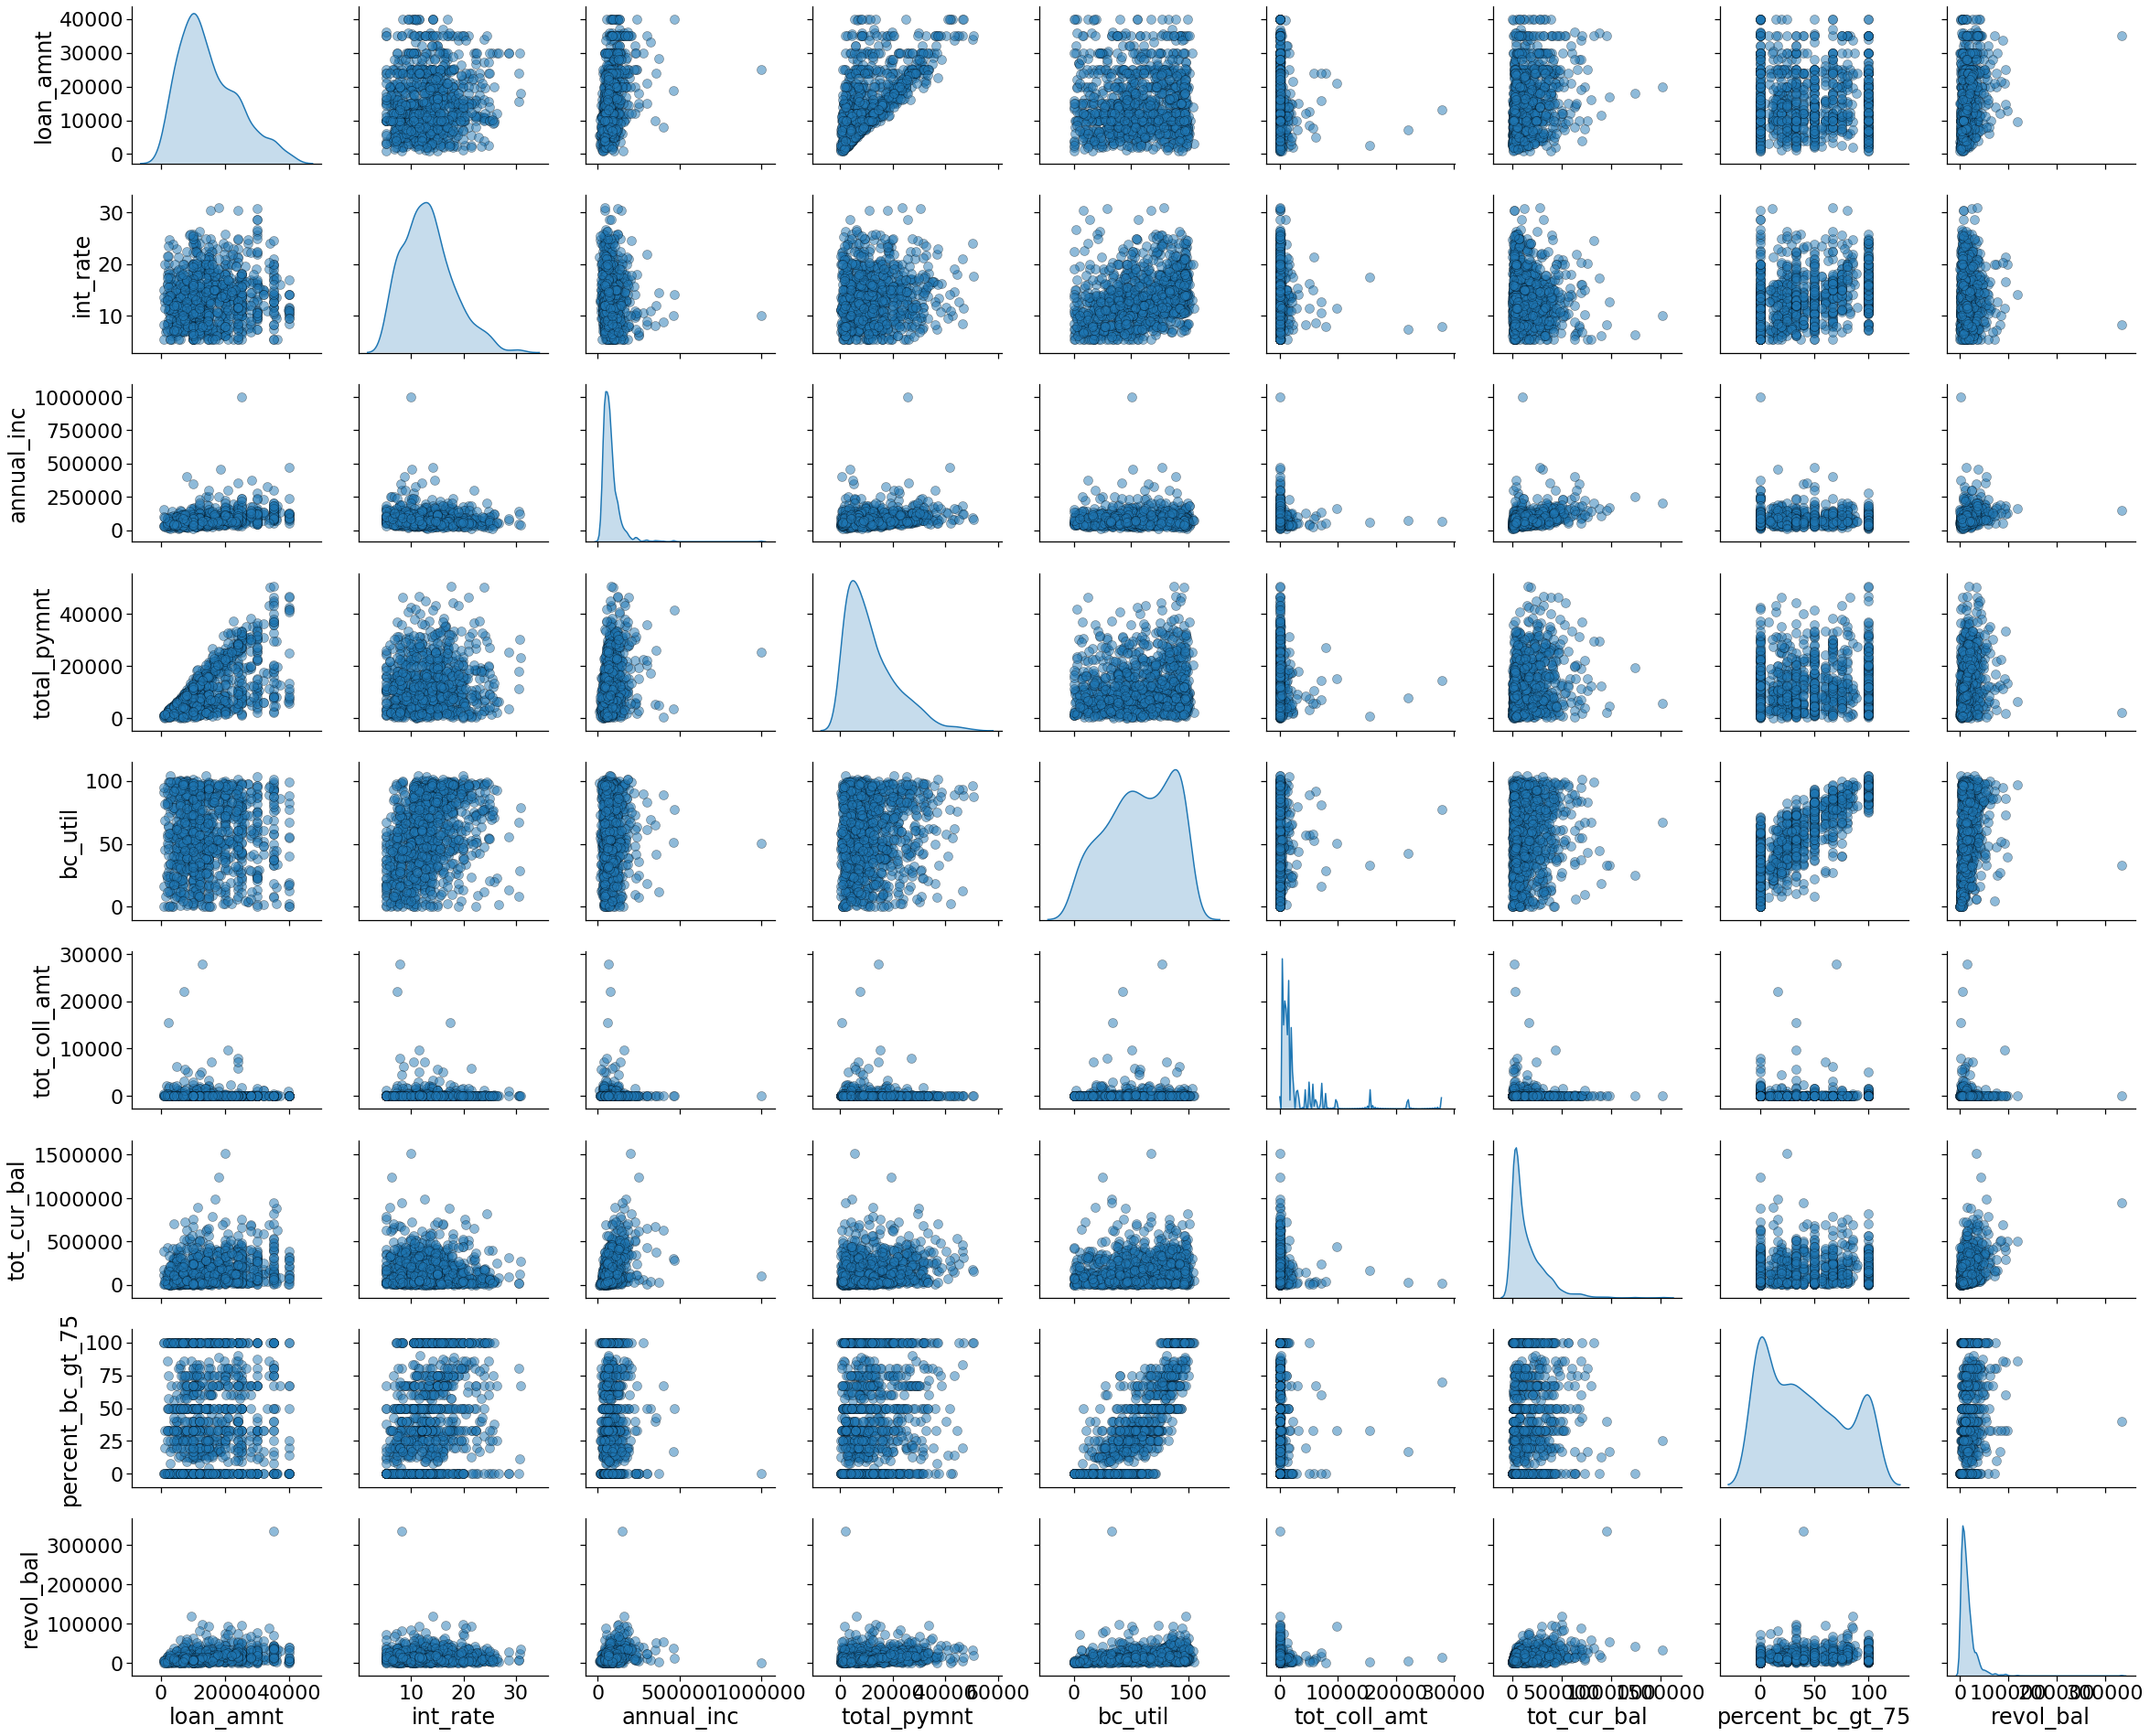

In [152]:
df_loan_vis = df_loan_sampled_cleaned.sample(1000)
cols = list(df_loan_sampled_cleaned.select_dtypes(include=[np.number]).columns)
# Use plotting context to tempoprary change plotting settings
# (the earlier specified font is too large)
pairplot_rc = {"lines.markersize": 10}
with sns.plotting_context("notebook", font_scale=2.0, rc=pairplot_rc):
    pp = sns.pairplot(df_loan_vis[cols],
                      height=3, aspect=1.2,
                      # Change marker styles:
                      plot_kws=dict(edgecolor="k", linewidth=0.5, alpha=0.5),
                      # "diag" adjusts/tunes the diagonal plots:
                      diag_kws=dict(shade=True),
                      diag_kind="kde")
    # Set custom space between graphs:
    pp.fig.subplots_adjust(wspace=0.2, hspace=0.2)

    There exists some outliers that make it hard to interpret the data properly.

**We remove the outliers that are beyond the 95% percentile.**

In [7]:
cols = list(df_loan_sampled_cleaned.select_dtypes(include=[np.number]).columns)
delete_entries = []
for col in cols:
    col_data = df_loan_sampled_cleaned[col]
    delete_entries.extend(col_data[col_data >= col_data.quantile(0.95)].index.tolist())
df_loan_sampled_cleaned = df_loan_sampled_cleaned.drop(set(delete_entries),axis = 0)

**Let's repeat the previous plot.**

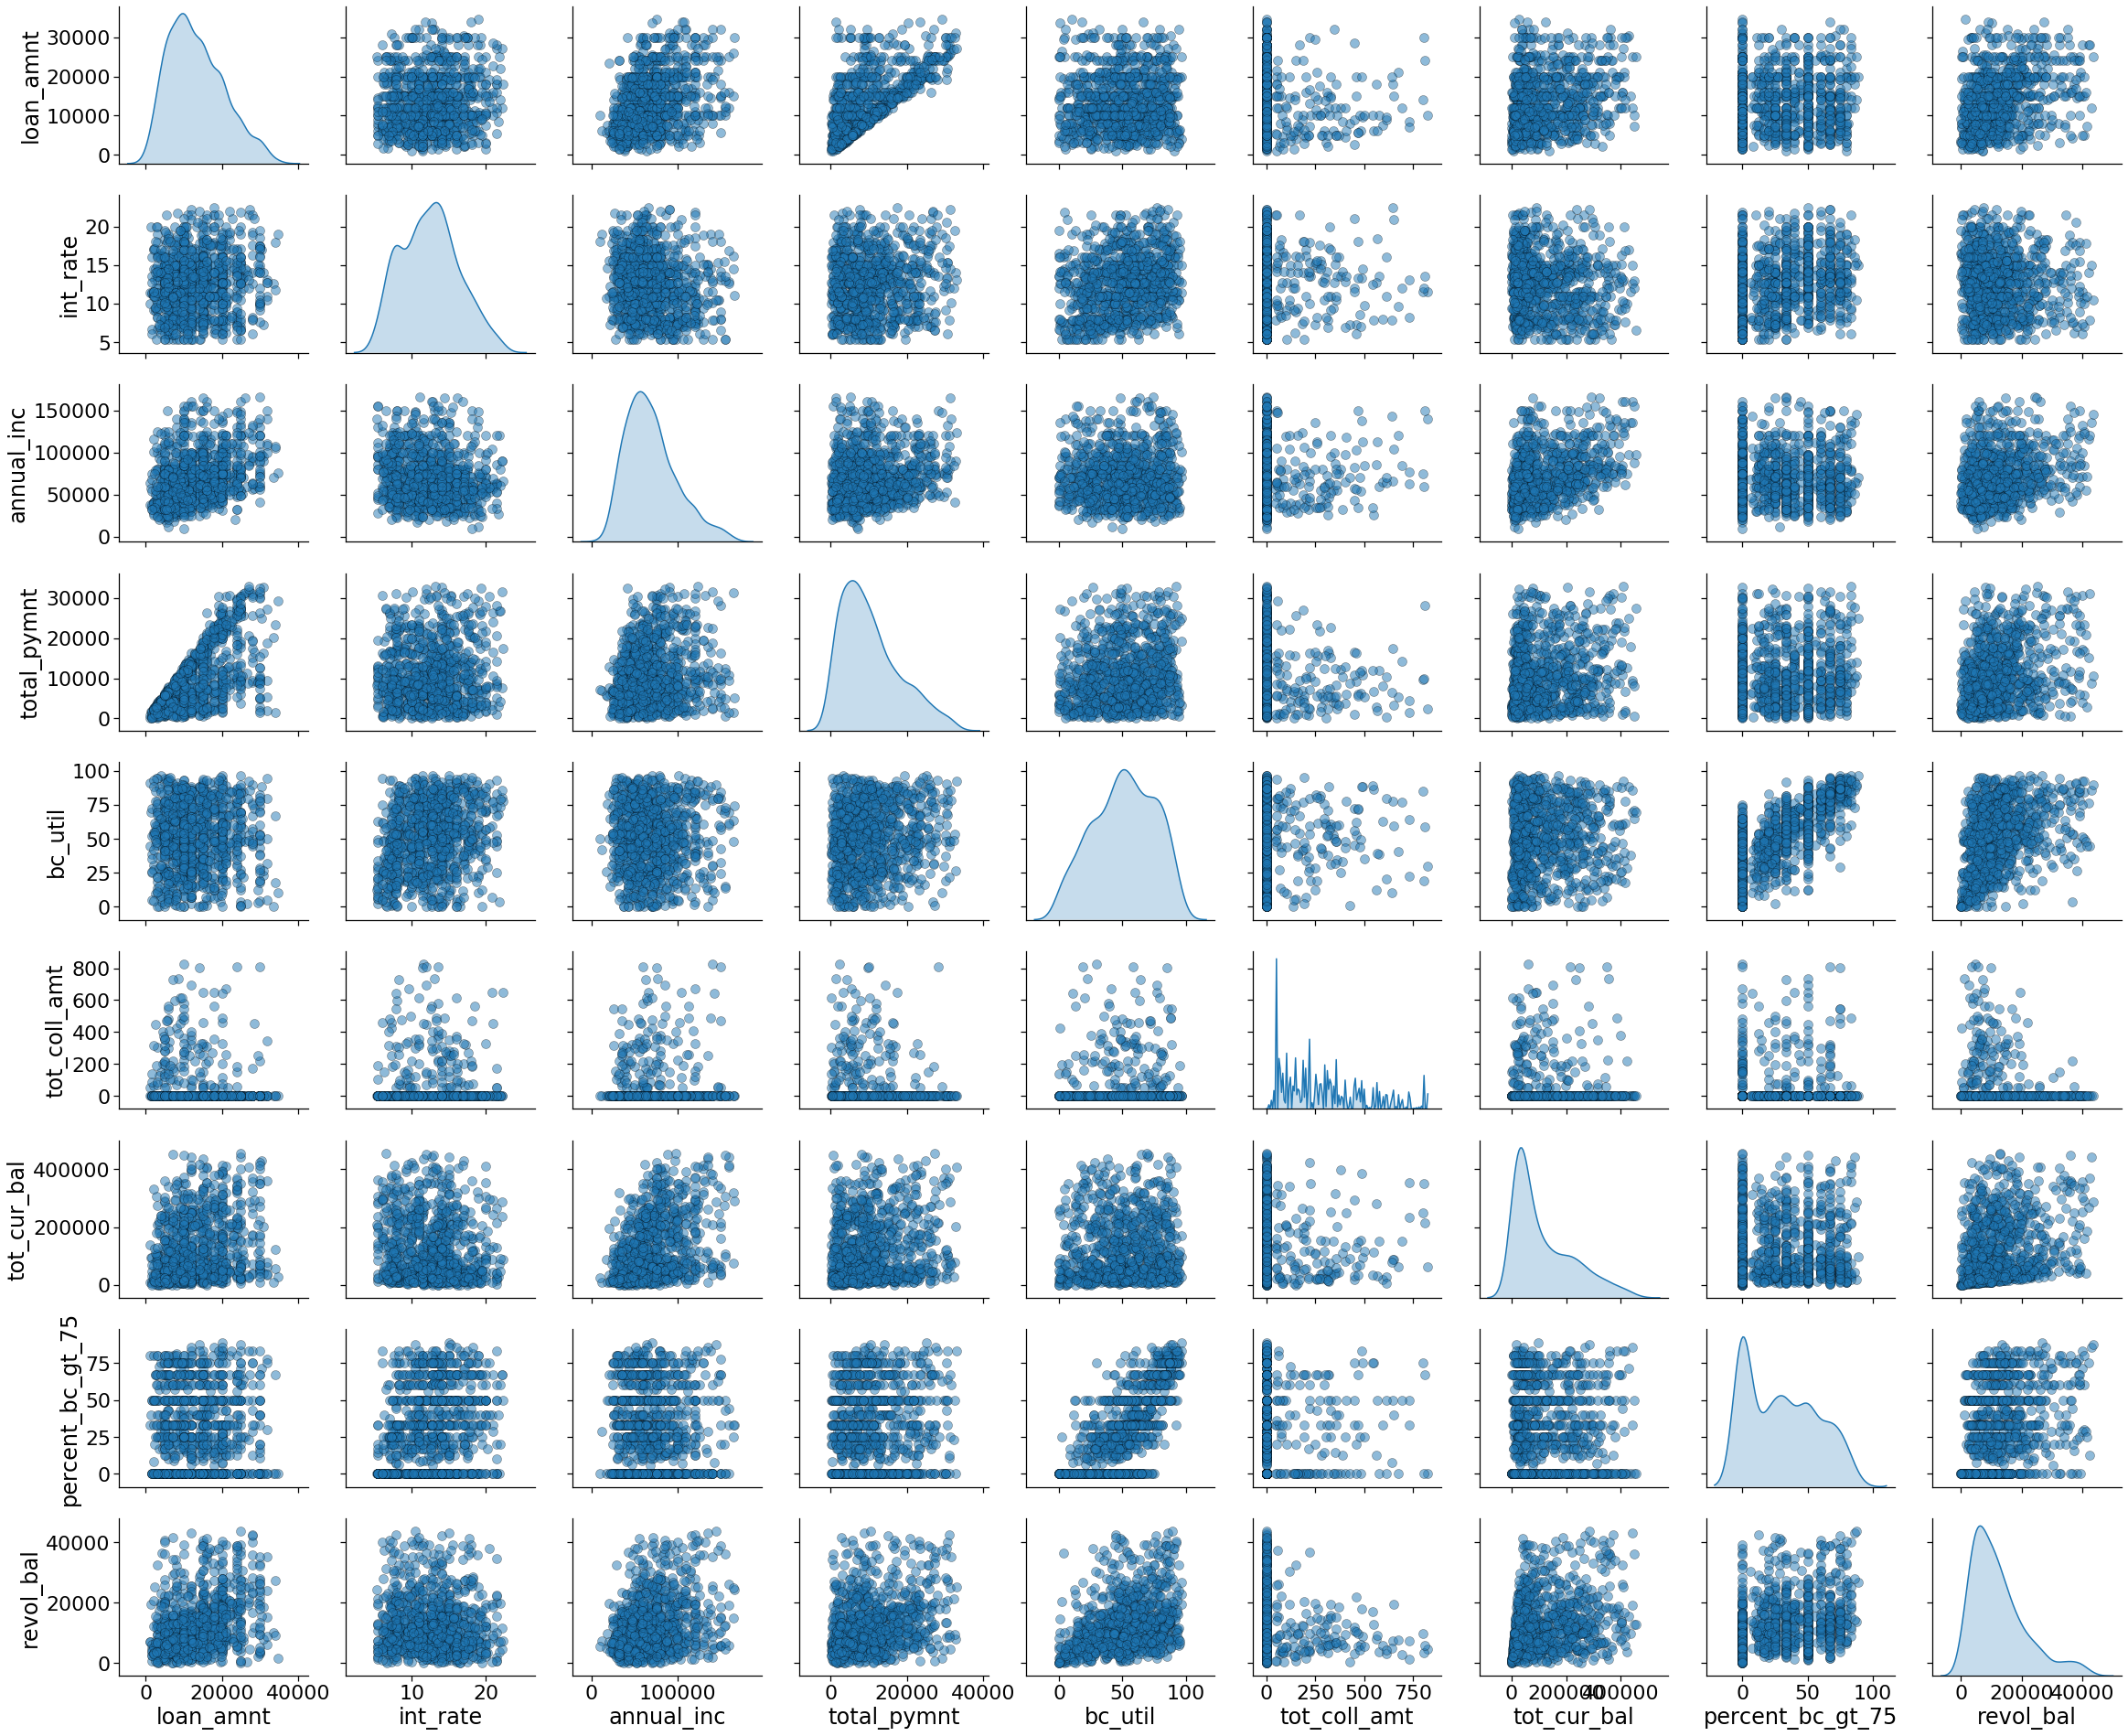

In [154]:
df_loan_vis = df_loan_sampled_cleaned.sample(1000)
cols = list(df_loan_sampled_cleaned.select_dtypes(include=[np.number]).columns)
# Use plotting context to tempoprary change plotting settings
# (the earlier specified font is too large)
pairplot_rc = {"lines.markersize": 10}
with sns.plotting_context("notebook", font_scale=2.0, rc=pairplot_rc):
    pp = sns.pairplot(df_loan_vis[cols],
                      height=3, aspect=1.2,
                      # Change marker styles:
                      plot_kws=dict(edgecolor="k", linewidth=0.5, alpha=0.5),
                      # "diag" adjusts/tunes the diagonal plots:
                      diag_kws=dict(shade=True),
                      diag_kind="kde")
    # Set custom space between graphs:
    pp.fig.subplots_adjust(wspace=0.2, hspace=0.2)

- **There are no strong corrolations between these variables. However, we can notice some corrolation between the total payment and the loan amount variables.**
- **Some of the distributions is slighlty skewed, but not to the extent that would require a transfomation.**

#### Let's view the corrolation matrix between these variables.

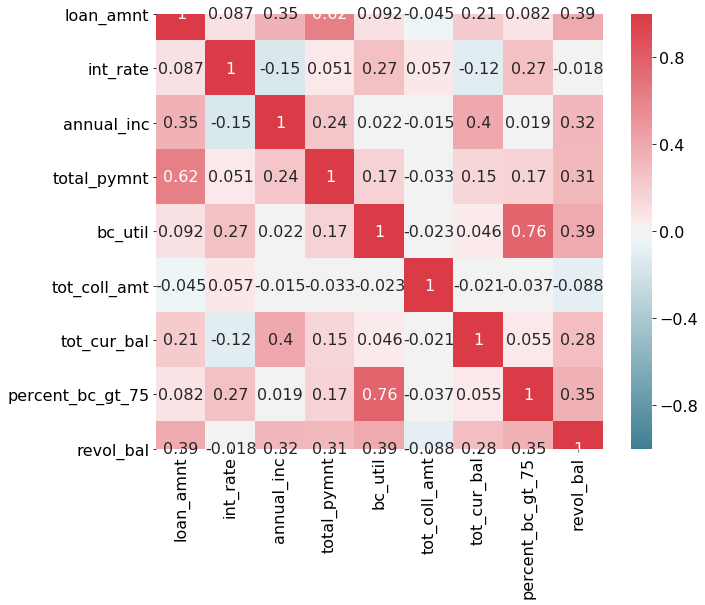

In [13]:
corr = df_loan_sampled_cleaned.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,vmin=-1, vmax=1,cmap=cmap,annot=True)

    We have already removed highly correlated variables. All existing variables are weakly corrolated except for the loan amount and the payment amount as well as the bc_util and the percent_bc_gt_75.

### Let's visualize some categorical variables

#### Loan Status

To ease the analysis, we group all delayed loans under one status "Bad loan".

C:\Users\ammus\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


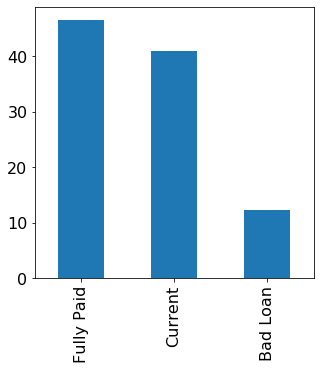

In [11]:
n_rows = df_loan_sampled_cleaned.shape[0]
df_loan_sampled_cleaned['loan_status'].replace(['Charged Off','In Grace Period','Late (31-120 days)','Late (16-30 days)','Default'],'Bad Loan',inplace=True)
(df_loan_sampled_cleaned['loan_status'].value_counts()/n_rows*100).plot('bar',figsize=(5,5))

    Most loans fall in the fully paied and the currnet status. A relatively fewer bad loans are available. This would make a harder for classification problems since a trade-off between precision and recall is necessary.
    
#### Purpose

Why do people take loans?

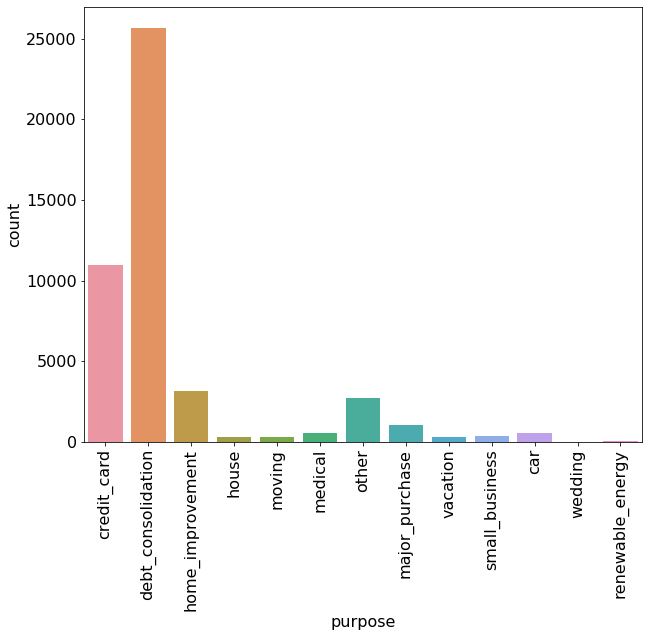

In [155]:
sns.countplot(x='purpose', data = df_loan_sampled_cleaned)
plt.xticks(rotation=90);

    Most loans are for debt consolidation followed by credit cards issuing. 
    
#### Borrower's State 

Which states have more borrower's?

C:\Users\ammus\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


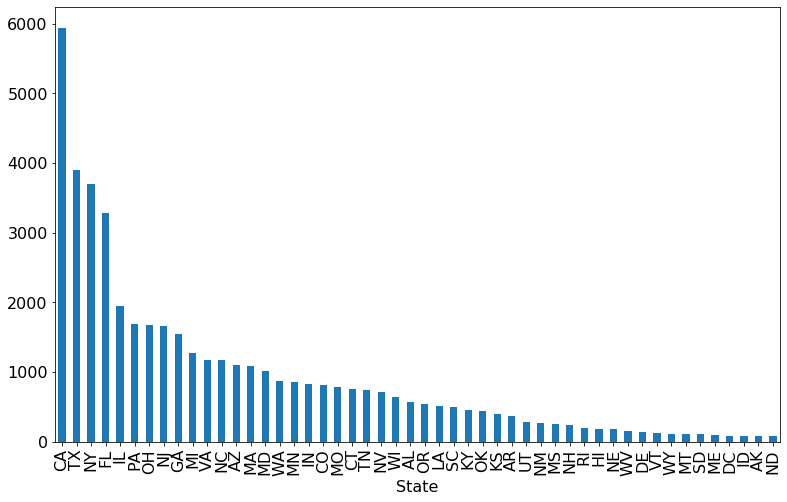

In [189]:
df_loan_sampled_cleaned['addr_state'].value_counts().plot('bar',figsize=(13,8))
plt.xlabel('State');

    We can note that relatively large states like CA or TX have high number of borrower's. But still a state like Washington DC has very small number. This is something interesting!

[Text(0.5, 0, 'Issue Month')]

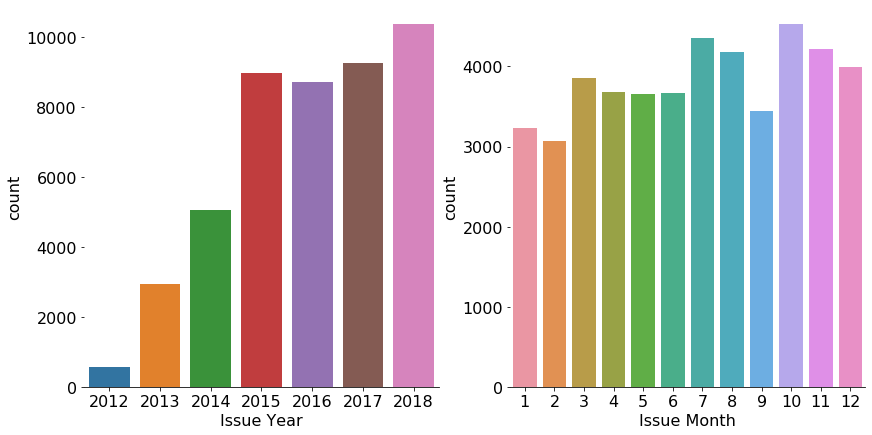

In [163]:
debt_issue_year = df_loan_sampled_cleaned['issue_d'].dt.year
debt_issue_month = df_loan_sampled_cleaned['issue_d'].dt.month

f, axes = plt.subplots(1, 2, figsize=(14, 7))
sns.despine(left=True)

sns.countplot(debt_issue_year,ax=axes[0])
axes[0].set(xlabel="Issue Year")

sns.countplot(debt_issue_month,ax=axes[1])
axes[1].set(xlabel="Issue Month")

    The number of loans issues increased significantly from 2012 to 2018. As for the issuing month, this is some slight variations, but the number of loans is relatively higher on the second half of the year.


### Multivariable Analysis
We can understand the data better by plotting more variables within the plot.

### Relations to Loan Status

#### Percent of Bank cars exceeding 75% of their limit

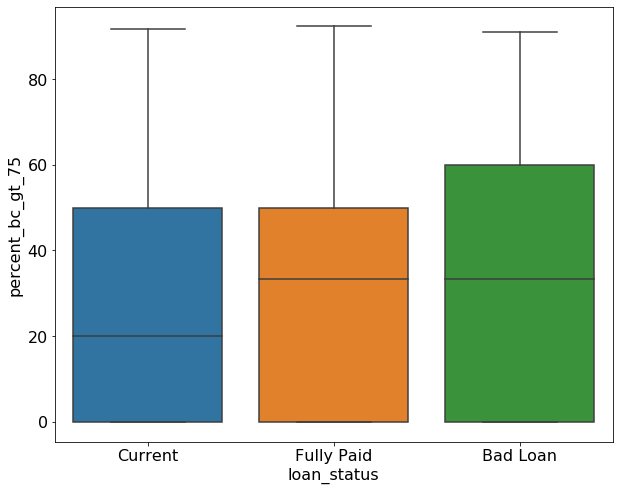

In [157]:
sns.boxplot(x='loan_status',y='percent_bc_gt_75',data = df_loan_sampled_cleaned)

    Overall, bad loans tend to have a slighltly higher percent_bc_gt_75; especially by comparing third quartile.
    
#### Home Ownership

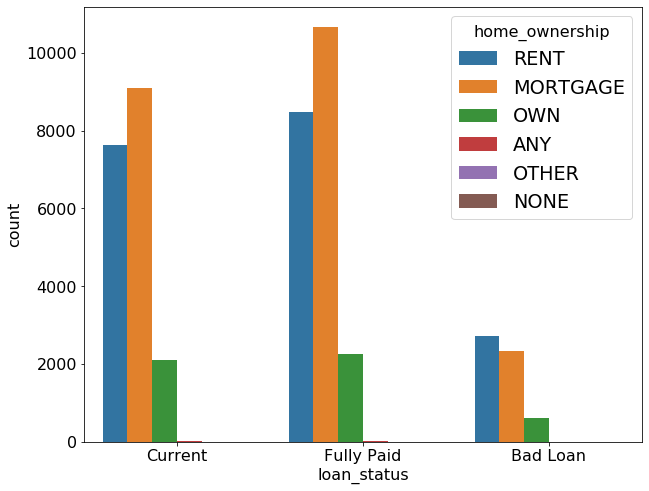

In [172]:
sns.countplot(x='loan_status',hue ='home_ownership',data=df_loan_sampled_cleaned)

    Those owning a house are less likely to default on the loan. On the other hand, the largest portions of those with bad loans are renting a house or on mortgage. 
    
#### Loan amount

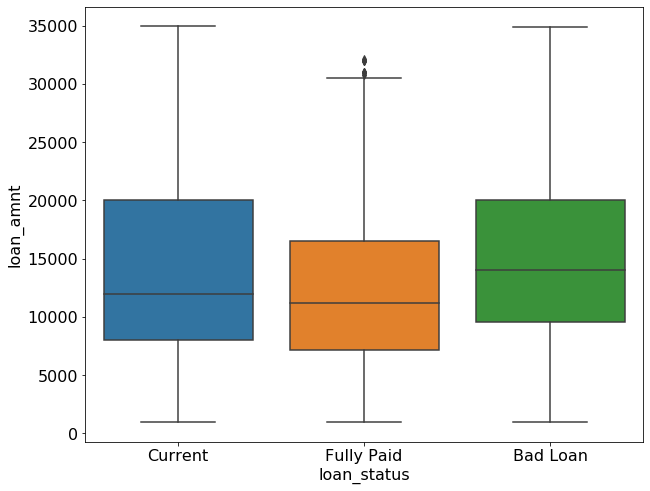

In [160]:
sns.boxplot(x='loan_status',y='loan_amnt',data = df_loan_sampled_cleaned)

    Bad loans have a larger loan amount overall. The loan amounnt are almost around $15,000.


#### Interest rate

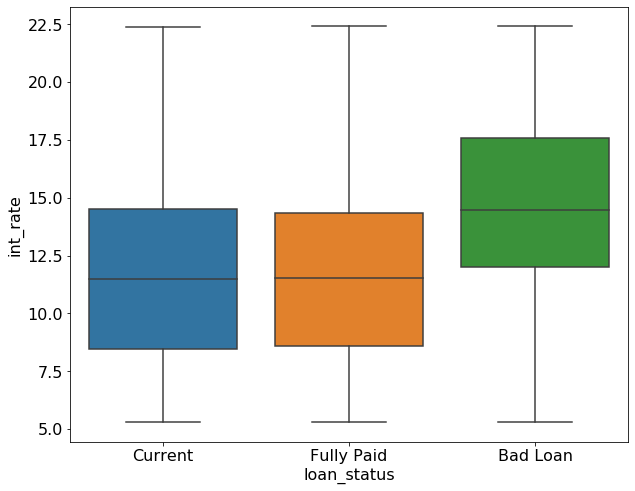

In [12]:
sns.boxplot(x='loan_status',y='int_rate',data = df_loan_sampled_cleaned)

    Bad loans have a higher interest rate compared to fully_paid ones. The interest rates varies between 5% and over 20%. 


#### Interest rate & Term

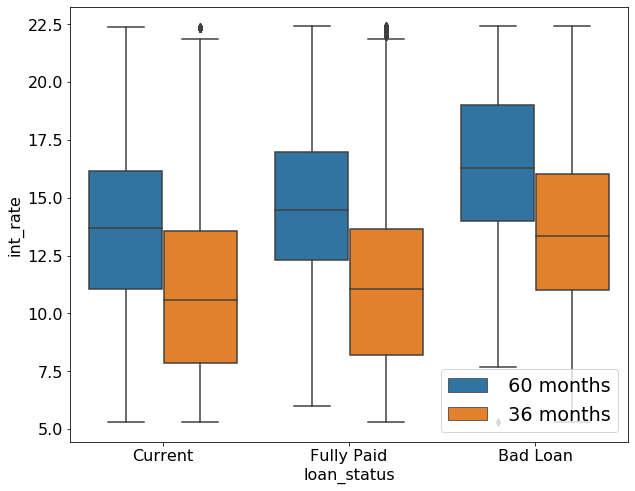

In [162]:
sns.boxplot(x='loan_status',y='int_rate',hue = 'term', data = df_loan_sampled_cleaned)
plt.legend(loc = 4)

    If we consider the effect of the loan term in addition to the interest rate, we can note that a longer term (60 months) would have a higher interest rate.

## Regression of total payment

#### We can plot the relation between total payment and the loan amount and plot a simple linear regression line. There was no clear pattern in the scatter plot above, so we introduce additional variables to see if we can infer some better relations. First, we introduce the intest rate, and then introduce the loan term.

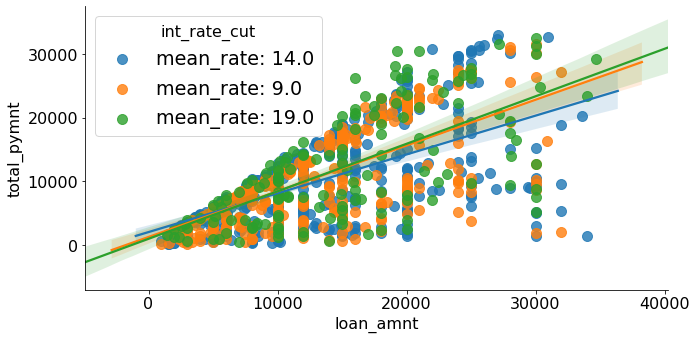

In [164]:
df_loan_vis['int_rate_cut'] = pd.cut(df_loan_vis['int_rate'],3, labels=["low", "medium", "high"])
int_mean = df_loan_vis.groupby(['int_rate_cut']).mean().round(0)['int_rate']
df_loan_vis['int_rate_cut'].replace({'low': 'mean_rate: '+ str(int_mean[0]),
                                     'medium': 'mean_rate: '+ str(int_mean[1]),
                                    'high': 'mean_rate: '+ str(int_mean[2])},inplace=True)
sns.lmplot(x='loan_amnt',y='total_pymnt',hue='int_rate_cut',data=df_loan_vis,legend_out=False,height=5, # make the plot 5 units high
    aspect=2)

#### It is expected that reducing the interest rate should result in a lower slope of the regression line. However, this relationship wasn't clear in the above graph. An mean interest rate of 9% resulted in almost same payments as a mean interest rate of 19%. This should be investigated further.

#### One way to explain this contradition is by introducing the loan term variable.

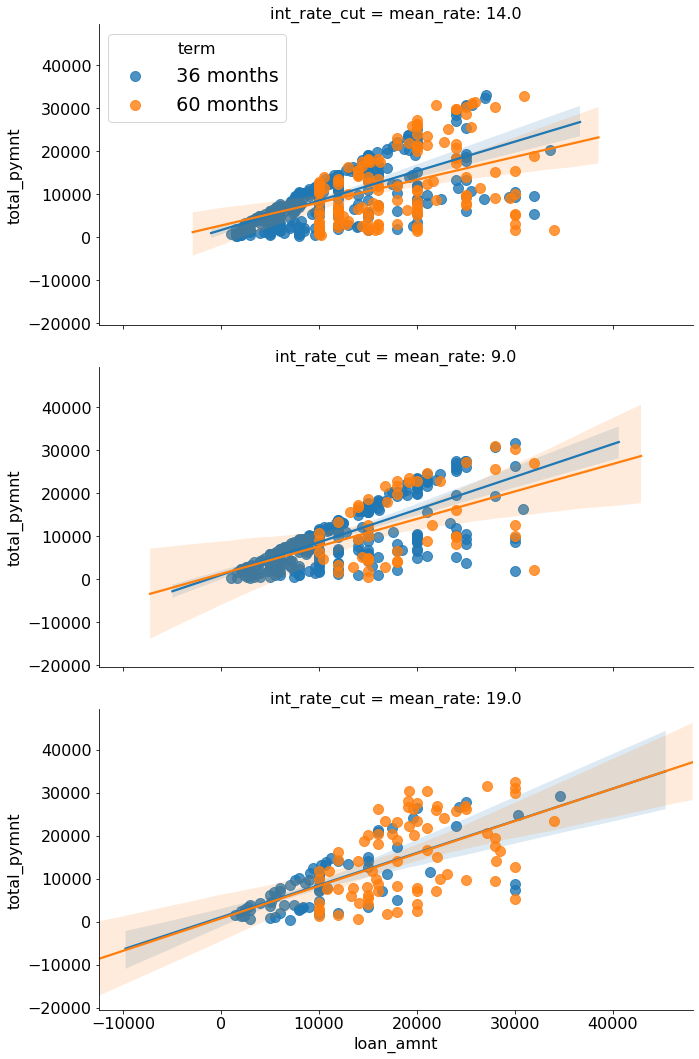

In [167]:
df_loan_vis['int_rate_cut'] = pd.cut(df_loan_vis['int_rate'],3, labels=["low", "medium", "high"])
int_mean = df_loan_vis.groupby(['int_rate_cut']).mean().round(0)['int_rate']
df_loan_vis['int_rate_cut'].replace({'low': 'mean_rate: '+ str(int_mean[0]),
                                     'medium': 'mean_rate: '+ str(int_mean[1]),
                                    'high': 'mean_rate: '+ str(int_mean[2])},inplace=True)
sns.lmplot(x='loan_amnt',y='total_pymnt',hue='term',row = 'int_rate_cut',data=df_loan_vis,legend_out=False,height=5, # make the plot 5 units high
    aspect=2)

#### We note that a shorter loan term resulted in higher payments. For a mean interest rate of 19%, the term factor did't effect the regression line significantly. 

## Conclusion:

    In this notebook, we just had a rough view of the dataset; however, there are many more relations to unveil. We investiaged the distributions of differnt numerical and categorical variables, and shown how they can affect the loan status (classification) and the payment amount (regression). Further work will focus on investigating the relations more systematically using some statistcal modeling techniques. We can always go back to the dataset for further cleaning and exploration. 